###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [7]:
df1=pd.read_csv('college_1.csv')
df2=pd.read_csv('college_2.csv')

df=pd.concat([df1,df2])
df=df.reset_index(drop=True)
df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [8]:
df[df['CodeKata Score']>15000].to_csv('Exceeded expectations.csv')
df[(df['CodeKata Score']<15000) & (df['CodeKata Score']>10000)].to_csv('Reached_expectations.csv')
df[(df['CodeKata Score']<10000) & (df['CodeKata Score']>7000)].to_csv('Needs_Improvement.csv')
df[df['CodeKata Score']<7000].to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [9]:
print(df['Previous Geekions'].mean())
print(df['CodeKata Score'].mean())

3842.3529411764707
4051.764705882353


###### No of students participated 

In [10]:
df.iloc[:,0].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [11]:
df4=df[(df['python']>0) | (df['mysql']>0) | (df['python_en']>0) | (df['computational_thinking']>0)]
df4.loc[:,'Name'].count()


113

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [12]:
df[['Name','CodeKata Score']].sort_values(by='CodeKata Score',ascending=False).head(3)

,Name,CodeKata Score
0,A.Dharani,24500
1,V.JEEVITHA,21740
2,HEMAVATHI.R,19680


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [13]:
df[['Name','Previous Geekions']].sort_values(by='Previous Geekions',ascending=False).head(3)

,Name,Previous Geekions
0,A.Dharani,24500
1,V.JEEVITHA,21740
2,HEMAVATHI.R,19680


###### Department wise codekata performence (pie chart)

([<matplotlib.patches.Wedge at 0x22fd059a640>,
 [Text(-0.5411937677359137, 0.9576582405868004, 'Computer Science and Engineering'),
  Text(0.1794146978630061, -1.085269720479995, 'Electronics and Communication Engineering'),
  Text(1.0331050799533028, -0.3777484530407501, 'Electronics and Electrical Engineering')])

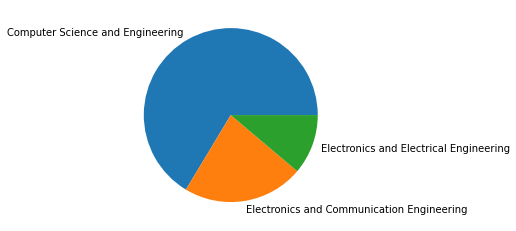

In [14]:
df2=pd.DataFrame(df.groupby('Department')['CodeKata Score'].sum())
plt.pie(np.array(df2['CodeKata Score'].values),labels=df2.index)

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [15]:
df2=pd.DataFrame(df.groupby(['Department']).agg({'CodeKata Score':'max'}))

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


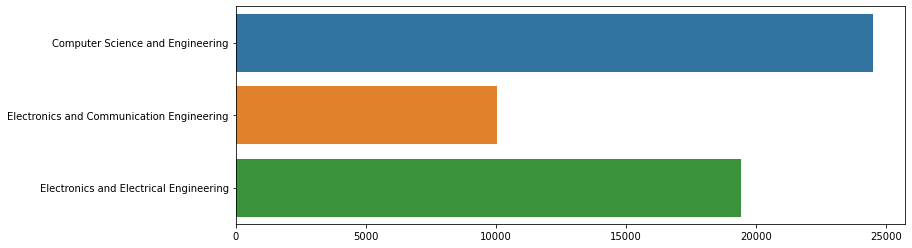

In [16]:
x=np.array(df2.index)
y=np.array(df2['CodeKata Score'].values)
fig, ax = plt.subplots(figsize=(12, 4))
 

sns.barplot(y,x,ax=ax)
plt.show()